<a href="https://colab.research.google.com/github/JianhanZhang/MDST-Tutorial/blob/main/checkpoint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checkpoint 1

Reminder:

- You are being evaluated for compeletion and effort in this checkpoint.
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [ ]:
edu = pd.read_csv('states_edu.csv')

edu.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [ ]:
#Rename columns
edu.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

edu.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [ ]:
edu.notna().sum()

PRIMARY_KEY                     1715
STATE                           1715
YEAR                            1715
ENROLL_ALL_EST                  1224
TOTAL_REVENUE                   1275
FEDERAL_REVENUE                 1275
STATE_REVENUE                   1275
LOCAL_REVENUE                   1275
TOTAL_EXPENDITURE               1275
INSTRUCTION_EXPENDITURE         1275
SUPPORT_SERVICES_EXPENDITURE    1275
OTHER_EXPENDITURE               1224
CAPITAL_OUTLAY_EXPENDITURE      1275
ENROLL_PREK                     1542
ENROLL_KINDER                   1632
ENROLL_4                        1632
ENROLL_8                        1632
ENROLL_12                       1632
ENROLL_PRIMARY                  1020
ENROLL_HS                       1071
ENROLL_ALL                      1632
AVG_MATH_4_SCORE                 565
AVG_MATH_8_SCORE                 602
AVG_READING_4_SCORE              650
AVG_READING_8_SCORE              562
dtype: int64

In [ ]:
#We want to focus on Grade 8 Math, so we drop all rows where Grade 8 Math score is missing. This should
#still leave us with 602 rows, which seems to be sufficient data to work with.
edu.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
edu

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


In [ ]:
edu.isna().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL_ALL_EST                  205
TOTAL_REVENUE                   163
FEDERAL_REVENUE                 163
STATE_REVENUE                   163
LOCAL_REVENUE                   163
TOTAL_EXPENDITURE               163
INSTRUCTION_EXPENDITURE         163
SUPPORT_SERVICES_EXPENDITURE    163
OTHER_EXPENDITURE               205
CAPITAL_OUTLAY_EXPENDITURE      163
ENROLL_PREK                      84
ENROLL_KINDER                    74
ENROLL_4                         74
ENROLL_8                         74
ENROLL_12                        74
ENROLL_PRIMARY                  205
ENROLL_HS                       154
ENROLL_ALL                       74
AVG_MATH_4_SCORE                 38
AVG_MATH_8_SCORE                  0
AVG_READING_4_SCORE              81
AVG_READING_8_SCORE             124
dtype: int64

In [ ]:
#For the reason stated in the tutorial, we replace missing values in ENROLL_ALL_EST with ENROLL_ALL
edu["ENROLL_ALL_EST"] = edu["ENROLL_ALL_EST"].fillna(edu["ENROLL_ALL"])

In [ ]:
edu.isna().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL_ALL_EST                   74
TOTAL_REVENUE                   163
FEDERAL_REVENUE                 163
STATE_REVENUE                   163
LOCAL_REVENUE                   163
TOTAL_EXPENDITURE               163
INSTRUCTION_EXPENDITURE         163
SUPPORT_SERVICES_EXPENDITURE    163
OTHER_EXPENDITURE               205
CAPITAL_OUTLAY_EXPENDITURE      163
ENROLL_PREK                      84
ENROLL_KINDER                    74
ENROLL_4                         74
ENROLL_8                         74
ENROLL_12                        74
ENROLL_PRIMARY                  205
ENROLL_HS                       154
ENROLL_ALL                       74
AVG_MATH_4_SCORE                 38
AVG_MATH_8_SCORE                  0
AVG_READING_4_SCORE              81
AVG_READING_8_SCORE             124
dtype: int64

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 8 Math

How many years of data are logged in our dataset?

In [ ]:
print(edu.YEAR.unique())
print(len(edu.YEAR.unique()))
print(edu.YEAR.unique().min())
print(edu.YEAR.unique().max())
#A total of 13 years between 1990 and 2019 are logged

[1992 2000 2003 2005 2007 2009 2011 2013 2015 1990 2017 1996 2019]
13
1990
2019


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [ ]:
edu.groupby('STATE')['AVG_MATH_8_SCORE'].mean()[['MICHIGAN', 'OHIO']]
#Ohio has higher average Grade 8 math score across all the years of choice

STATE
MICHIGAN    276.166667
OHIO        282.250000
Name: AVG_MATH_8_SCORE, dtype: float64

Find the average for your chosen test across all states in 2019

In [ ]:
edu.AVG_MATH_8_SCORE.mean()

278.28073089700996

For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [ ]:
edu.groupby('STATE')['AVG_MATH_8_SCORE'].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable.

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [ ]:
#Refresh on what features the dataset have
edu.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [ ]:
#Add per capita instruction, support services, and total expenditures
edu['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = edu['INSTRUCTION_EXPENDITURE'] / edu['ENROLL_ALL']
edu['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = edu['SUPPORT_SERVICES_EXPENDITURE'] / edu['ENROLL_ALL']
edu['TOTAL_EXPENDITURE_PER_STUDENT'] = edu['TOTAL_EXPENDITURE'] / edu['ENROLL_ALL']

#Add a composite Grade 4 score by adding up Grade 4 reading snd math scores
edu['AVG_COMPOSITE_4_SCORE'] = edu['AVG_READING_4_SCORE'] + edu['AVG_MATH_4_SCORE']

#Add ratio of kindergarten enrollment to Grade 8 enrollment
edu['ENROLL_RATIO_KINDER_TO_8'] = edu['ENROLL_KINDER'] / edu['ENROLL_8']

edu.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,INSTRUCTION_EXPENDITURE_PER_STUDENT,SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT,TOTAL_EXPENDITURE_PER_STUDENT,AVG_COMPOSITE_4_SCORE,ENROLL_RATIO_KINDER_TO_8
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,731634.0,208.0,252.0,207.0,NaN,2.025197,1.004650,3.627221,415.0,0.955795
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,673477.0,215.0,265.0,209.0,NaN,2.132082,1.496312,5.050774,424.0,1.089974
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,441490.0,210.0,256.0,211.0,NaN,2.184247,1.095128,3.948044,421.0,0.930577
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,5254844.0,208.0,261.0,202.0,NaN,2.732512,1.621537,5.164536,410.0,1.188461
5,1992_COLORADO,COLORADO,1992,612635.0,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,612635.0,221.0,272.0,217.0,NaN,2.680986,1.691007,5.329154,438.0,1.056924


Feature engineering justification:
1. Per capital instruction, support services, and total expenditures are added. This is to adjust for the fact that states with more students tend to spend more on education than states with fewer students.

2. A composite Grade 4 score that included both reading and math scores is added. This is because students' math performance might be predicted by their composite reading and math capabilities in Grade 8.

3. A ratio of kindergarten enrollment to Grade 8 enrollment is added. This is because kindergarten education might systematically impact students performance in Grade 8.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade Math Score')

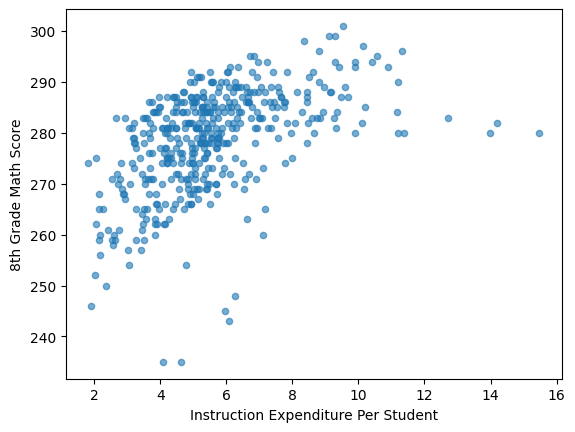

In [ ]:
edu.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Instruction Expenditure Per Student')
plt.ylabel('8th Grade Math Score')
#strong seemingly quadratic relationship

**<Relation Between Instructional Expenditure Per Student and 8th Grade Math Score.>**

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

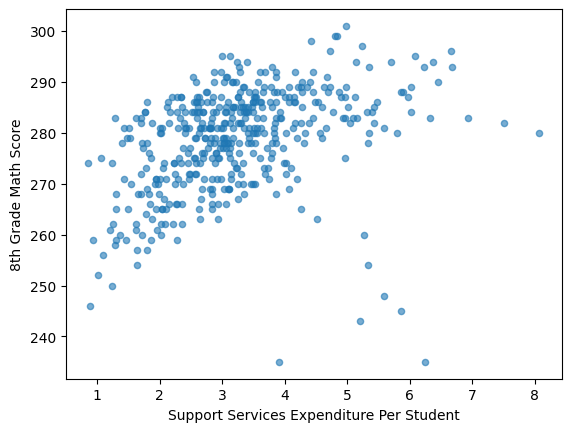

In [ ]:
edu.plot.scatter(x='SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Support Services Expenditure Per Student')
plt.ylabel('8th Grade Math Score')
#strong seemingly quatratic relationship

**<Relation Between Support Services Expenditure Per Student and 8th Grade Math Score>**

Text(0, 0.5, '8th Grade Math Score')

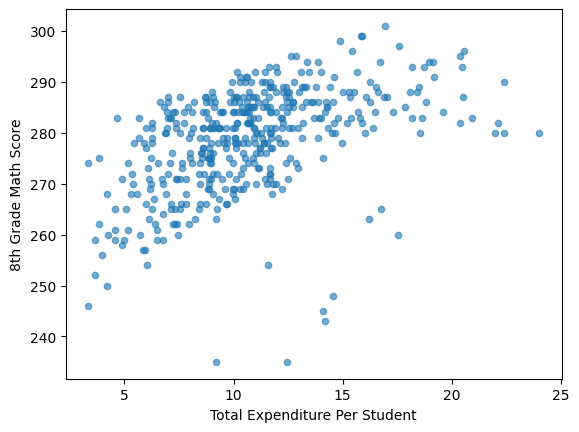

In [ ]:
edu.plot.scatter(x='TOTAL_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Total Expenditure Per Student')
plt.ylabel('8th Grade Math Score')
#sttrong quadratic or linear relationship

**<Relation Between Total Expenditure Per Student and 8th Grade Math Score>**

Text(0, 0.5, '8th Grade Math Score')

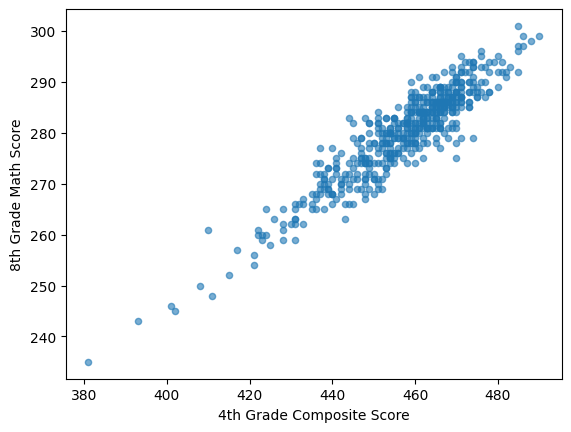

In [ ]:
edu.plot.scatter(x='AVG_COMPOSITE_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('4th Grade Composite Score')
plt.ylabel('8th Grade Math Score')
#strong linear relationship

**<Relation Between 4th Grade Composite Score and 8th Grade Math Score>**

Text(0, 0.5, '8th Grade Math Score')

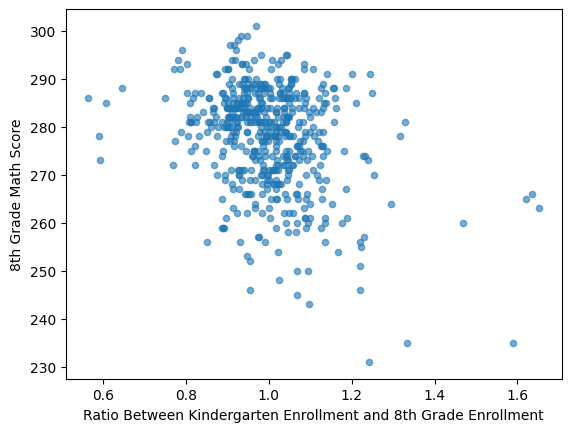

In [ ]:
edu.plot.scatter(x='ENROLL_RATIO_KINDER_TO_8', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Ratio Between Kindergarten Enrollment and 8th Grade Enrollment')
plt.ylabel('8th Grade Math Score')
#no obvious relationship

**<Relation Between Kindergarten to 8th Grade Enrollment Ratio and 8th Grade Math Score>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = edu[['TOTAL_EXPENDITURE_PER_STUDENT','AVG_COMPOSITE_4_SCORE']].dropna()
y = edu.loc[X.index]['AVG_MATH_8_SCORE']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [ ]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# create your model here
model = LinearRegression()

In [ ]:
#poly = PolynomialFeatures()
#X_train_transformed = poly.fit_transform(X_train)
#X_test_transformed = poly.fit_transform(X_test)

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [ ]:
#R^2 value
model.score(X_test, y_test)

0.902029021406077

In [ ]:
#mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

2.853971646023059

In [ ]:
#root mean squared error
np.mean((model.predict(X_test)-y_test)**2)**0.5

3.5132619897979405

We have copied over the graphs that visualize the model's performance on the training and testing set.

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

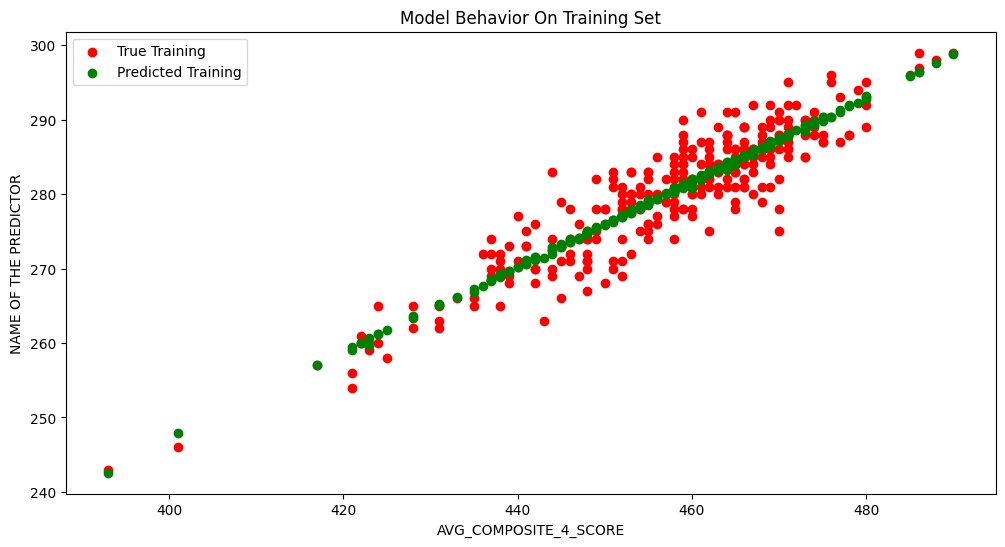

In [ ]:
col_name = 'AVG_COMPOSITE_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

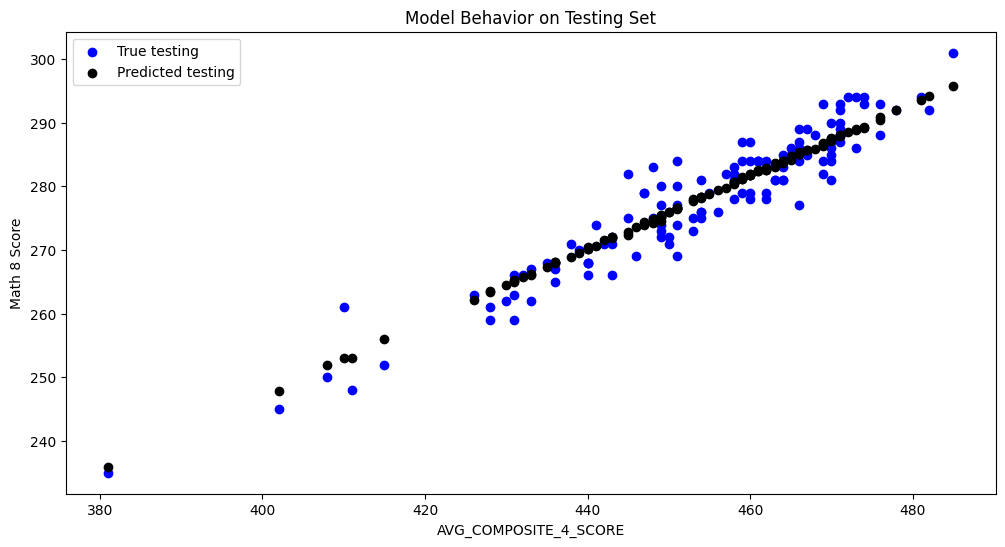

In [ ]:
col_name = 'AVG_COMPOSITE_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

In summary, after cleaning the data, I added several new features: per capita instructional expenditure, per capital support services expenditure, per capita total expenditure, 4th grade composite score, and teh ratio of kindergarten enrollment to 8th grade enrollment. I then found that per capita total expenditure and 4th grade composite score have linear or nearly linear relationships with 8th grade math score. In this light, I fitted a linear model to the above two variables to predict 8th grade reading score. The model achieved a high (> 0.9) R^2 score and low MAE and RMSE, and graphing the true value and predicted value also indicated that the model worked well on both training and testing sets. I thus conclude that the model is effective at predicting 8th grade math score overall.